Prepare the data:

1. Download the two different datasets (for white and red wines): 
https://archive.ics.uci.edu/ml/datasets/Wine+Quality.

2. Create a new column for the type of wine (eg. 1 for red and 0 for white). 
3. Fuse them into one dataset (hint: Use pandas).
4. Split dataset into training and test parts 

(`hint`: Use train_test_split from Scikit-Learn, it works directly with Pandas)
Then run the following tasks:

A) Use regression to predict the alcohol level of the wine on a test set.

B) Use binary classification to predict the type of wine on a test set.

C) Use multiclass classification to predict the quality of the wine on a test set.

For each task test two classifiers, report accuracy (on both test and train sets) with the default parameters. Perform some manual optimization of the parameters (at least 5 different values for each parameter) and plot the new obtained accuracy (on both test and train sets) as a function of the chosen parameter (max. 2). Using your best result, plot the feature importance for the binary classification or the coefficient magnitudes for regression 

(`hint`: choose your classifier accordingly).

 
You can work in small groups but you should submit your notebook individually. Deadline friday 01 of November at midnight.

In [1]:
%load_ext watermark
%watermark -p numpy,pandas,matplotlib,seaborn

numpy 1.15.4
pandas 0.25.1
matplotlib 2.2.3
seaborn 0.9.0


In [2]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from matplotlib import rc
font = {'family':'monospace','weight':'bold','size':25}
rc('font',**font) 
plt.rcParams['figure.figsize'] = [20,10]
plt.rcParams['lines.linewidth'] = 5.0
plt.rcParams['lines.markersize'] = 15.0

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning) 
#plt.rcParams.keys()

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Exploratory Data Analysis

In [6]:
# reading the whitewine in csv form
whitewine = pd.read_csv("winequality-white.csv")
whitewine["type"] = 0
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0


In [7]:
# reading the redwine in csv form
redwine = pd.read_csv("winequality-red.csv")
redwine["type"] = 1
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [8]:
# fuse two data frames to one data frame 
redwhite = pd.concat([redwine,whitewine],ignore_index=True)
redwhite.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
# general information of data frame
redwhite.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
type                    6497 non-null int64
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [10]:
# simple statistical information
redwhite.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


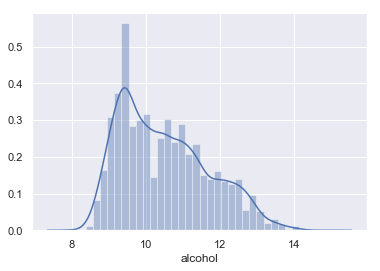

In [8]:
# check the distribution of alcohol
sns.distplot(redwhite["alcohol"])

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


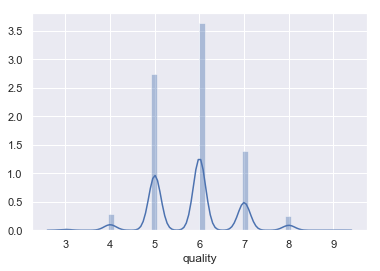

In [9]:
# check the distributhion of quality
sns.distplot(redwhite["quality"])

C:\Users\alisa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


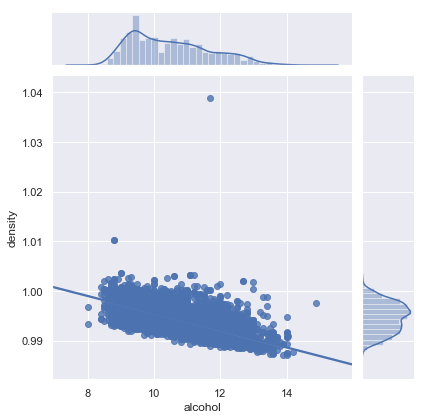

In [10]:
# scatter plot of "density" against "alcohol"
sns.jointplot(x="alcohol",y="density",data=redwhite,kind="reg")

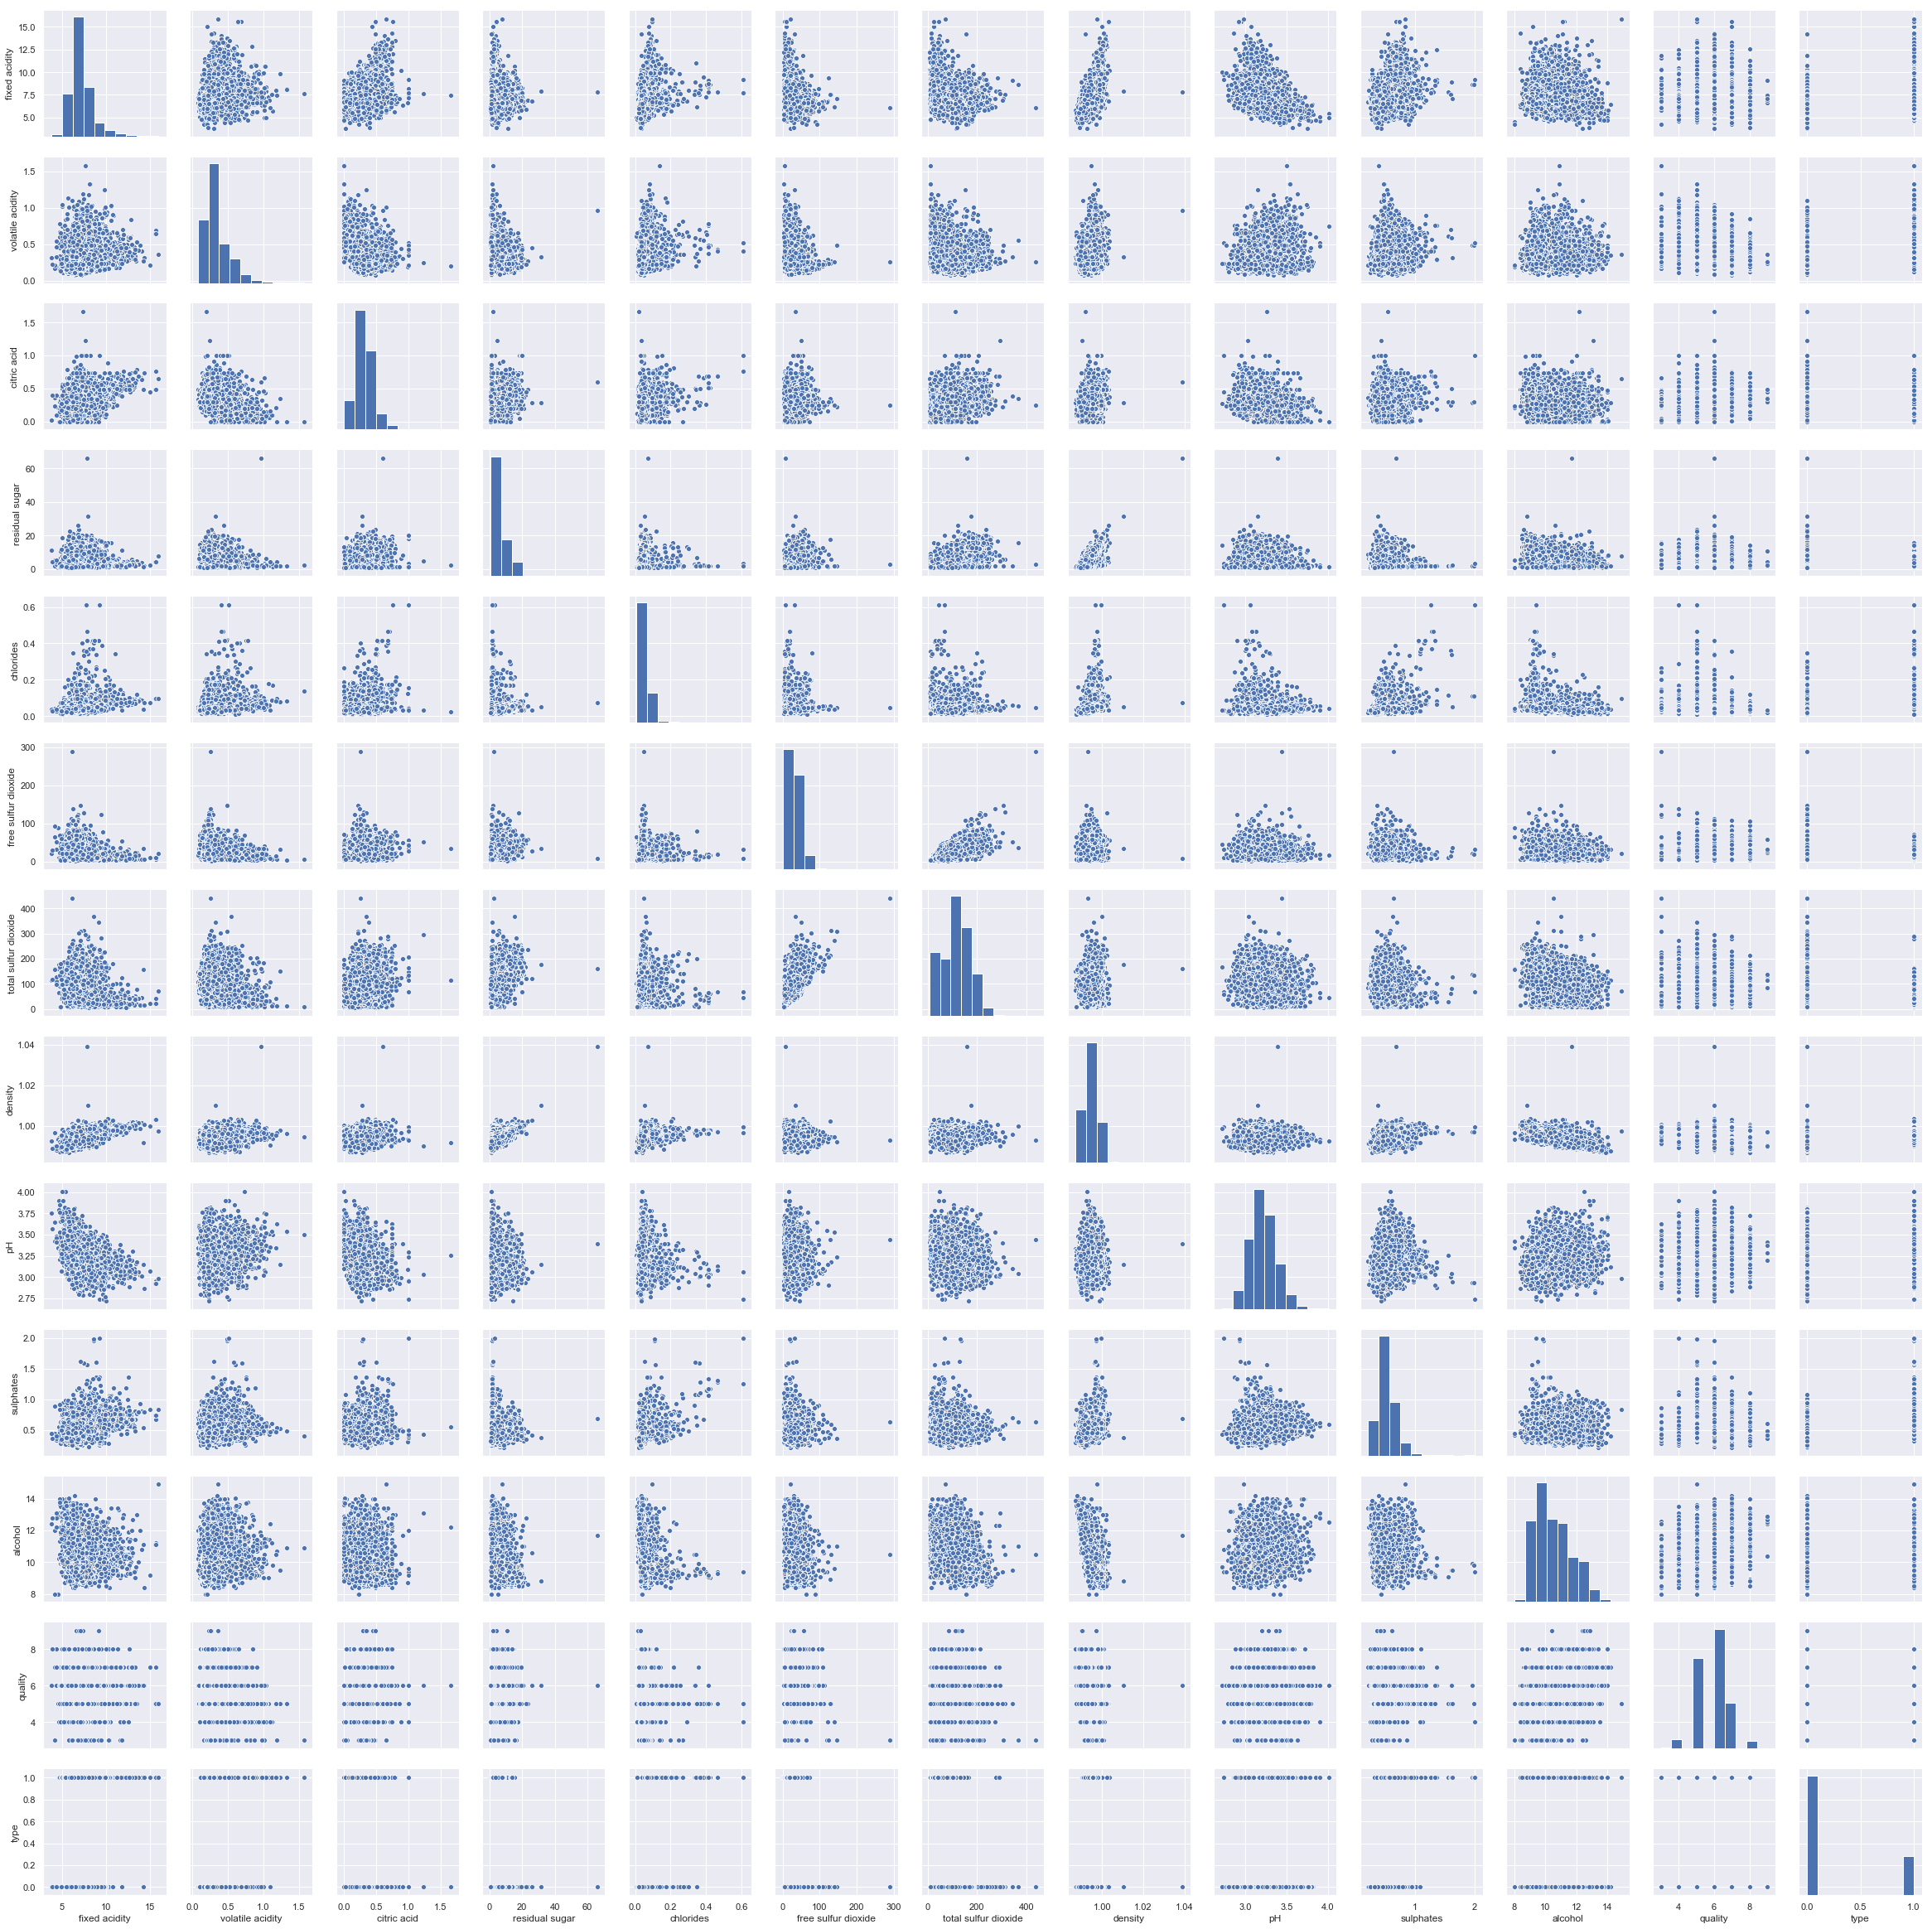

In [11]:
# pair plotting the data frame
sns.pairplot(redwhite)
# sns.pairplot(redwhite,hue="alcohol")

## Creation ML models

In [11]:
# create X and y for regression, classification and multiclass classification

X_reg = np.array(redwhite.drop(["alcohol"],axis=1))
y_reg = np.reshape(np.array(redwhite["alcohol"]),(-1,1))

X_bin = np.array(redwhite.drop(["type"],axis=1))
y_bin = np.reshape(np.array(redwhite["type"]),(-1,1))

X_mul = np.array(redwhite.drop(["quality"],axis=1))
y_mul = np.reshape(np.array(redwhite["quality"]),(-1,1))

### A) Use regression to predict the alcohol level of the wine on a test set

In [214]:
# fit standard scaler to y, so both X and y are using same scaler

scaler = StandardScaler().fit(y_reg)
X_reg = scaler.transform(X_reg)
y_reg = scaler.transform(y_reg)

In [150]:
# splitting the data to X and y
X_train, X_test, y_train, y_test = train_test_split(X_reg,y_reg,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872, 1), (1625, 1))

##### 1) Ridge for regression

In [160]:
from sklearn.linear_model import Ridge

# create the regressor with default parameters
ridge = Ridge()
ridge.fit(X_train,y_train)
print(ridge)

# report accuracy (on both train and test sets) with the default parameters
print("\nTraining set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Training set score: 0.44
Test set score: 0.40


In [161]:
# perform manual optimization of alpha

def optimize_ridge_alpha(alphas):
    d = {}
    for alpha in alphas:
        d["ridge"+str(alpha)] = Ridge(alpha=alpha).fit(X_train,y_train)
    train_score = []
    test_score = []
    for ridge in d.keys():
        print(ridge)
        print("Training set score: {:.2f}".format(d[ridge].score(X_train,y_train)))
        train_score.append(d[ridge].score(X_train,y_train))
        print("Test set score: {:.2f}".format(d[ridge].score(X_test,y_test)),"\n")
        test_score.append(d[ridge].score(X_test,y_test))
    return train_score,test_score
        
train_score, test_score = optimize_ridge_alpha(alphas=[0.001,0.01,0.1,1,10])

ridge0.001
Training set score: 0.80
Test set score: 0.83 

ridge0.01
Training set score: 0.64
Test set score: 0.62 

ridge0.1
Training set score: 0.47
Test set score: 0.43 

ridge1
Training set score: 0.44
Test set score: 0.40 

ridge10
Training set score: 0.42
Test set score: 0.38 



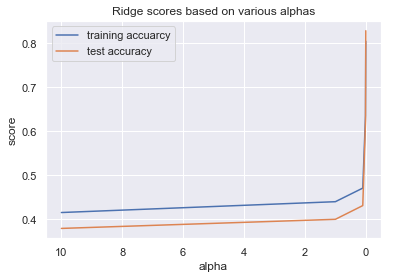

In [162]:
# plotting ridge score based on alpha
def plot_ridge_alpha(train_set,test_set,alphas):
    plt.plot(alphas,train_set,label="training score")
    plt.plot(alphas,test_set,label="test score")
    plt.xlabel("alpha")
    plt.ylabel("score")
    plt.title("Ridge scores based on various alphas")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_ridge_alpha(train_score,test_score,alphas=[0.001,0.01,0.1,1,10])

In [163]:
# perform manual optimization of tol

def optimize_ridge_tol(tols):
    d = {}
    for tol in tols:
        d["ridge"+str(tol)] = Ridge(tol=tol).fit(X_train,y_train)
    train_score = []
    test_score = []
    for ridge in d.keys():
        print(ridge)
        print("Training set score: {:.2f}".format(d[ridge].score(X_train,y_train)))
        train_score.append(d[ridge].score(X_train,y_train))
        print("Test set score: {:.2f}".format(d[ridge].score(X_test,y_test)),"\n")
        test_score.append(d[ridge].score(X_test,y_test))
    return train_score,test_score
        
train_score, test_score = optimize_ridge_tol(tols=[0.00001,0.0001,0.001,0.01,0.1,1,10])

ridge1e-05
Training set score: 0.44
Test set score: 0.40 

ridge0.0001
Training set score: 0.44
Test set score: 0.40 

ridge0.001
Training set score: 0.44
Test set score: 0.40 

ridge0.01
Training set score: 0.44
Test set score: 0.40 

ridge0.1
Training set score: 0.44
Test set score: 0.40 

ridge1
Training set score: 0.44
Test set score: 0.40 

ridge10
Training set score: 0.44
Test set score: 0.40 



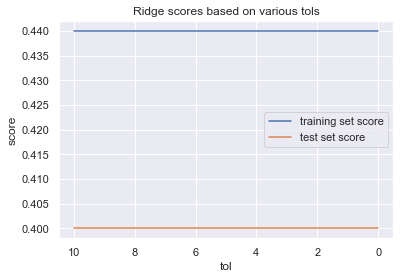

In [164]:
# plotting ridge score based on tol
def plot_ridge_tol(train_set,test_set,tols):
    plt.plot(tols,train_set,label="training set score")
    plt.plot(tols,test_set,label="test set score")
    plt.xlabel("tol")
    plt.ylabel("score")
    plt.title("Ridge scores based on various tols")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_ridge_tol(train_score,test_score,tols=[0.00001,0.0001,0.001,0.01,0.1,1,10])

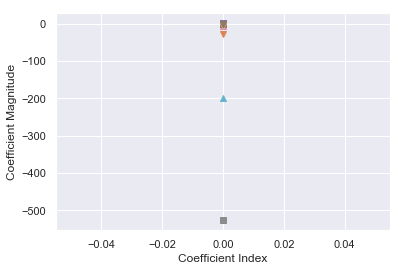

In [170]:
# finding the coefficient index and coefficient magnitude

names = ['fixed acidity','volatile acidity','citric acid','residual sugar',
         'chlorides','free sulfur dioxide','total sulfur dioxide','density',
         'pH','sulphates','quality','type']

def plot_ridge():
    plt.plot(Ridge(alpha=0.001).fit(X_train,y_train).coef_,'s',label="Ridge alpha=0.001")
    plt.plot(Ridge(alpha=0.01).fit(X_train,y_train).coef_,'^',label="Ridge alpha=0.01")
    plt.plot(Ridge(alpha=0.1).fit(X_train,y_train).coef_,'v',label="Ridge alpha=0.1")
    # plt.plot(Ridge(alpha=1).fit(X_train,y_train).coef_,'o',label="Ridge alpha=1")
    # plt.xticks(range(len(names)),names,rotation=45)
    # plt.hlines(0,0,range(len(names)-1))
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Magnitude")
    # plt.hlines(0,0,len(lr.coef_))
    # plt.ylim(-25,25)
    # plt.legend()

plot_ridge()

In [171]:
# using GridSearchCV to search multiple parameters simeltanously

# define the parameter values that should be searched
alpha_range = [0.001,0.01,0.1,1,10]
tol_range = [0.00001,0.0001,0.001,0.01,0.1,1,10]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range,tol=tol_range)

# instantiate the estimator
ridge_grid = Ridge()

# instantiate and fit the grid
grid_ridge = GridSearchCV(ridge_grid,param_grid,cv=10,scoring='neg_mean_squared_error',return_train_score=False)
grid_ridge.fit(X_reg,y_reg)

# view the results
# ridge_df = pd.DataFrame(grid_knn.cv_results_)[['mean_test_score','std_test_score','params']]

# examine the best model
print(grid_ridge.best_score_)
print(grid_ridge.best_params_)
print(grid_ridge.best_estimator_)

-0.19501547532871907
{'alpha': 0.001, 'tol': 1e-05}
Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=1e-05)


In [179]:
# now we can use the best parameters for prediction

ridge = Ridge(alpha=0.001,tol=1e-05).fit(X_train,y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test,y_test)))

y_pred = ridge.predict(X_test)
print("Prediction set score: {:.2f}".format(np.sum(y_pred==y_test)/len(y_pred)))

Training set score: 0.80
Test set score: 0.83
Prediction set score: 0.00


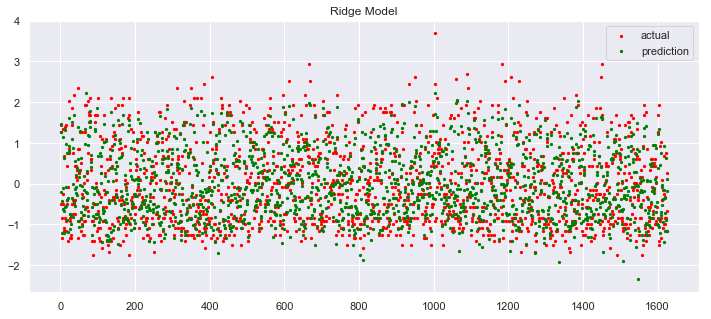

In [190]:
# scatter plot of y_test and y_pred

plt.figure(figsize=(12,5))
x = np.linspace(1,len(y_test)+1,len(y_test))

plt.scatter(x=x,y=y_test,s=5,color="red",label="actual")
plt.scatter(x=x,y=y_pred,s=5,color="green",label="prediction")
plt.title("Ridge Model")
plt.legend()

plt.show()

##### 2) Lasso for regression

In [191]:
from sklearn.linear_model import Lasso

# create the regressor with default parameters
lasso = Lasso()
lasso.fit(X_train,y_train)
print(lasso)

# report accuracy (on both train and test sets) with the default parameters
print("\nTraining set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Training set score: 0.07
Test set score: 0.06


In [193]:
# perform manual optimization of alpha

def optimize_lasso_alpha(alphas):
    d = {}
    for alpha in alphas:
        d["lasso"+str(alpha)] = Lasso(alpha=alpha).fit(X_train,y_train)
    train_score = []
    test_score = []
    for lasso in d.keys():
        print(lasso)
        print("Training set score: {:.2f}".format(d[lasso].score(X_train,y_train)))
        train_score.append(d[lasso].score(X_train,y_train))
        print("Test set score: {:.2f}".format(d[lasso].score(X_test,y_test)),"\n")
        test_score.append(d[lasso].score(X_test,y_test))
    return train_score,test_score
        
train_score, test_score = optimize_lasso_alpha(alphas=[0.001,0.01,0.1,1,10])

lasso0.001
Training set score: 0.44
Test set score: 0.40 

lasso0.01
Training set score: 0.38
Test set score: 0.35 

lasso0.1
Training set score: 0.32
Test set score: 0.30 

lasso1
Training set score: 0.07
Test set score: 0.06 

lasso10
Training set score: 0.03
Test set score: 0.03 



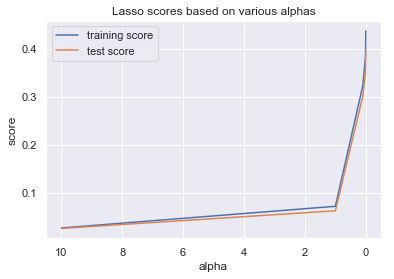

In [195]:
# plotting lasso score based on alpha
def plot_lasso_alpha(train_set,test_set,alphas):
    plt.plot(alphas,train_set,label="training score")
    plt.plot(alphas,test_set,label="test score")
    plt.xlabel("alpha")
    plt.ylabel("score")
    plt.title("Lasso scores based on various alphas")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_lasso_alpha(train_score,test_score,alphas=[0.001,0.01,0.1,1,10])

In [196]:
# perform manual optimization of max_iter

def optimize_lasso_maxiter(max_iters):
    d = {}
    for max_iter in max_iters:
        d["lasso"+str(max_iter)] = Lasso(max_iter=max_iter).fit(X_train,y_train)
    train_score = []
    test_score = []
    for lasso in d.keys():
        print(lasso)
        print("Training set score: {:.2f}".format(d[lasso].score(X_train,y_train)))
        train_score.append(d[lasso].score(X_train,y_train))
        print("Test set score: {:.2f}".format(d[lasso].score(X_test,y_test)),"\n")
        test_score.append(d[lasso].score(X_test,y_test))
    return train_score,test_score
        
train_score, test_score = optimize_lasso_maxiter(max_iters=[100,1000,10000,100000,1000000])

lasso100
Training set score: 0.07
Test set score: 0.06 

lasso1000
Training set score: 0.07
Test set score: 0.06 

lasso10000
Training set score: 0.07
Test set score: 0.06 

lasso100000
Training set score: 0.07
Test set score: 0.06 

lasso1000000
Training set score: 0.07
Test set score: 0.06 



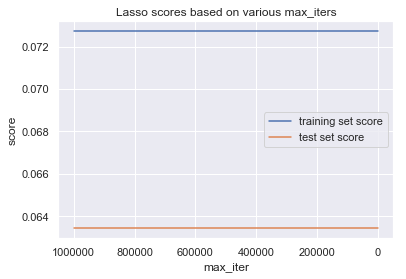

In [197]:
# plotting lasso score based on max_iter
def plot_lasso_maxiter(train_set,test_set,max_iters):
    plt.plot(max_iters,train_set,label="training set score")
    plt.plot(max_iters,test_set,label="test set score")
    plt.xlabel("max_iter")
    plt.ylabel("score")
    plt.title("Lasso scores based on various max_iters")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_lasso_maxiter(train_score,test_score,max_iters=[100,1000,10000,100000,1000000])

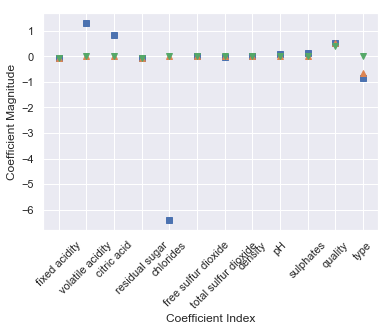

In [199]:
# finding the coefficient index and coefficient magnitude

names = ['fixed acidity','volatile acidity','citric acid','residual sugar',
         'chlorides','free sulfur dioxide','total sulfur dioxide','density',
         'pH','sulphates','quality','type']

def plot_lasso():
    plt.plot(Lasso(alpha=0.001).fit(X_train,y_train).coef_,'s',label="Lasso alpha=0.001")
    plt.plot(Lasso(alpha=0.01).fit(X_train,y_train).coef_,'^',label="Lasso alpha=0.01")
    plt.plot(Lasso(alpha=0.1).fit(X_train,y_train).coef_,'v',label="Lasso alpha=0.1")
    # plt.plot(Ridge(alpha=1).fit(X_train,y_train).coef_,'o',label="Ridge alpha=1")
    plt.xticks(range(len(names)),names,rotation=45)
    # plt.hlines(0,0,range(len(names)-1))
    plt.xlabel("Coefficient Index")
    plt.ylabel("Coefficient Magnitude")
    # plt.hlines(0,0,len(lr.coef_))
    # plt.ylim(-25,25)
    # plt.legend()

plot_lasso()

In [200]:
# using GridSearchCV to search multiple parameters simeltanously

# define the parameter values that should be searched
alpha_range = [0.001,0.01,0.1,1,10]
tol_range = [0.00001,0.0001,0.001,0.01,0.1,1,10]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(alpha=alpha_range,tol=tol_range)

# instantiate the estimator
lasso_grid = Lasso()

# instantiate and fit the grid
grid_lasso = GridSearchCV(lasso_grid,param_grid,cv=10,scoring='neg_mean_squared_error',return_train_score=False)
grid_lasso.fit(X_reg,y_reg)

# view the results
# ridge_df = pd.DataFrame(grid_knn.cv_results_)[['mean_test_score','std_test_score','params']]

# examine the best model
print(grid_lasso.best_score_)
print(grid_lasso.best_params_)
print(grid_lasso.best_estimator_)

-0.6106665866957915
{'alpha': 0.001, 'tol': 0.1}
Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False)


In [201]:
# now we can use the best parameters for prediction

lasso = Lasso(alpha=0.001,tol=0.1).fit(X_train,y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test,y_test)))

y_pred = lasso.predict(X_test)
print("Prediction set score: {:.2f}".format(np.sum(y_pred==y_test)/len(y_pred)))

Training set score: 0.44
Test set score: 0.40
Prediction set score: 0.00


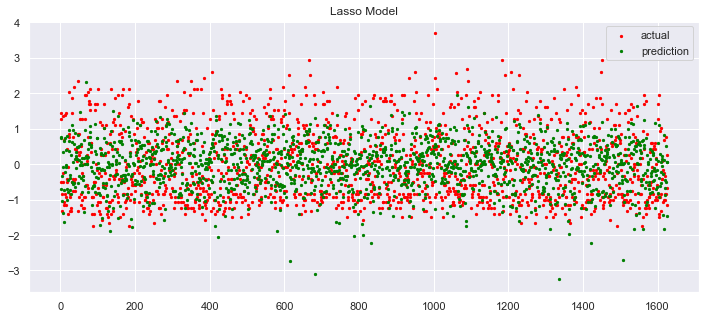

In [202]:
# scatter plot of y_test and y_pred

plt.figure(figsize=(12,5))
x = np.linspace(1,len(y_test)+1,len(y_test))

plt.scatter(x=x,y=y_test,s=5,color="red",label="actual")
plt.scatter(x=x,y=y_pred,s=5,color="green",label="prediction")
plt.title("Lasso Model")
plt.legend()

plt.show()

### B) Use binary classification to predict the type of the wine on a test set

In [216]:
# We should'nt scale binary or multiple classification since the data will convert to countinous!

In [217]:
# splitting the data to X and y
X_train, X_test, y_train, y_test = train_test_split(X_bin,y_bin,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872, 1), (1625, 1))

##### 1) LogisticRegression for binary classification

In [218]:
from sklearn.linear_model import LogisticRegression

# create the classifier with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
print(logreg)

# report accuracy (on both train and test sets) with the default parameters
print("\nTrain accuracy: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test accuracy: {:.3f}".format(logreg.score(X_test,y_test)))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Train accuracy: 0.983
Test accuracy: 0.977


C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [220]:
# perform manual optimization of C

def optimize_logreg_C(C):
    d = {}
    for c in C:
        d["logreg"+str(c)] = LogisticRegression(C=c).fit(X_train,y_train)
    train_accuracy = []
    test_accuracy = []
    for logreg in d.keys():
        print(logreg)
        print("Train accuracy: {:.2f}".format(d[logreg].score(X_train,y_train)))
        train_accuracy.append(d[logreg].score(X_train,y_train))
        print("Test accuracy: {:.2f}".format(d[logreg].score(X_test,y_test)),"\n")
        test_accuracy.append(d[logreg].score(X_test,y_test))
    return train_accuracy,test_accuracy
        
train_accuracy, test_accuracy = optimize_logreg_C(C=[0.001,0.01,0.1,1,10])

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

logreg0.001
Train accuracy: 0.94
Test accuracy: 0.93 

logreg0.01
Train accuracy: 0.95
Test accuracy: 0.94 

logreg0.1
Train accuracy: 0.97
Test accuracy: 0.96 

logreg1
Train accuracy: 0.98
Test accuracy: 0.98 

logreg10
Train accuracy: 0.99
Test accuracy: 0.98 



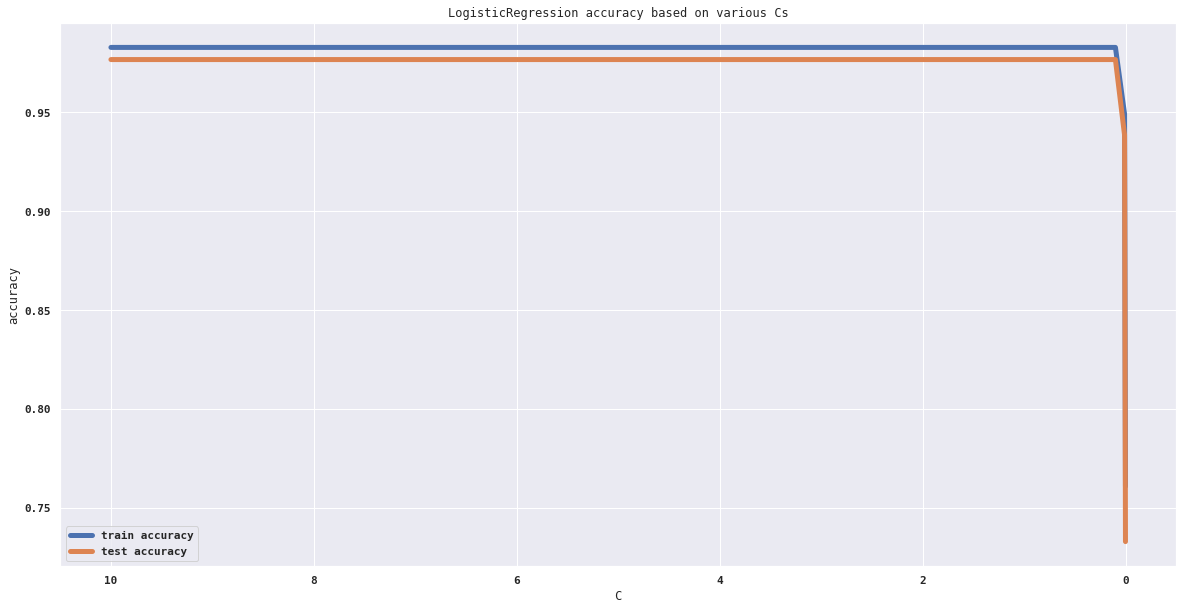

In [233]:
# plotting logreg accuracy based on C
def plot_logreg_C(train_set,test_set,C):
    plt.plot(C,train_set,label="train accuracy")
    plt.plot(C,test_set,label="test accuracy")
    plt.xlabel("C")
    plt.ylabel("accuracy")
    plt.title("LogisticRegression accuracy based on various Cs")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_logreg_C(train_accuracy,test_accuracy,C=[0.001,0.01,0.1,1,10])

In [224]:
# perform manual optimization of max_iter

def optimize_logreg_maxiter(max_iters):
    d = {}
    for max_iter in max_iters:
        d["logreg"+str(max_iter)] = LogisticRegression(max_iter=max_iter).fit(X_train,y_train)
    train_accuracy = []
    test_accuracy = []
    for logreg in d.keys():
        print(logreg)
        print("Train accuracy: {:.2f}".format(d[logreg].score(X_train,y_train)))
        train_accuracy.append(d[logreg].score(X_train,y_train))
        print("Test accuracy: {:.2f}".format(d[logreg].score(X_test,y_test)),"\n")
        test_accuracy.append(d[logreg].score(X_test,y_test))
    return train_accuracy,test_accuracy
        
train_accuracy, test_accuracy = optimize_logreg_maxiter(max_iters=[1,10,100,1000,10000])

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y wa

logreg1
Train accuracy: 0.76
Test accuracy: 0.73 

logreg10
Train accuracy: 0.95
Test accuracy: 0.94 

logreg100
Train accuracy: 0.98
Test accuracy: 0.98 

logreg1000
Train accuracy: 0.98
Test accuracy: 0.98 

logreg10000
Train accuracy: 0.98
Test accuracy: 0.98 



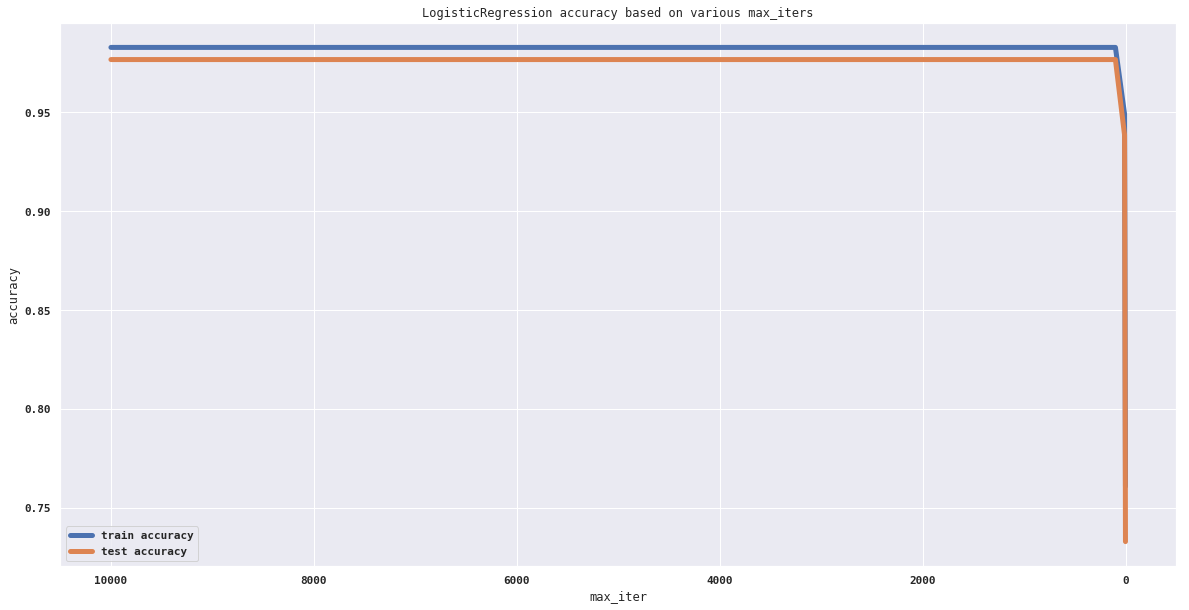

In [235]:
# plotting logreg accuracy based on max_iter
def plot_logreg_maxiter(train_set,test_set,max_iters):
    plt.plot(max_iters,train_set,label="train accuracy")
    plt.plot(max_iters,test_set,label="test accuracy")
    plt.xlabel("max_iter")
    plt.ylabel("accuracy")
    plt.title("LogisticRegression accuracy based on various max_iters")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_logreg_maxiter(train_accuracy,test_accuracy,max_iters=[1,10,100,1000,10000])

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

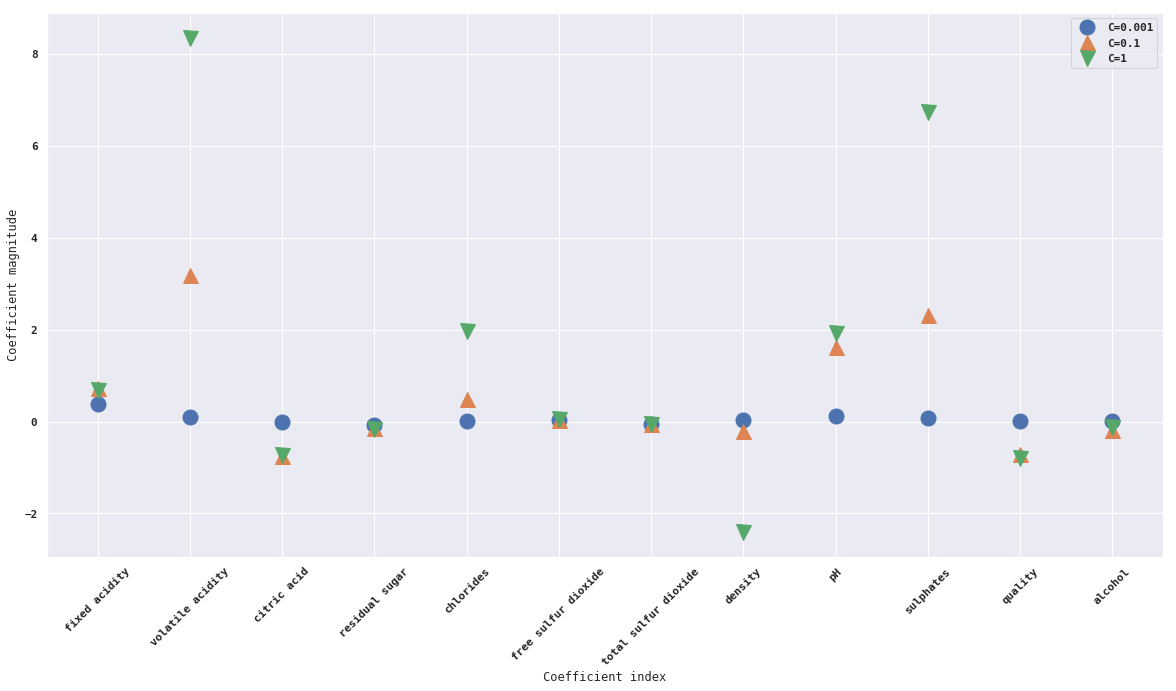

In [232]:
names = ['fixed acidity','volatile acidity','citric acid','residual sugar',
         'chlorides','free sulfur dioxide','total sulfur dioxide','density',
         'pH','sulphates','quality','alcohol']

# Logistic Regression with L2 regularization
def plot_logreg_l2():
    plt.plot(LogisticRegression(C=0.001).fit(X_train,y_train).coef_.T,'o',label="C=0.001")
    plt.plot(LogisticRegression(C=0.1).fit(X_train,y_train).coef_.T,'^',label="C=0.1")
    plt.plot(LogisticRegression(C=1).fit(X_train,y_train).coef_.T,'v',label="C=1")
    plt.xticks(range(len(names)),names,rotation=45)
    plt.hlines(0,0,range(len(names)))
    # plt.ylim(-5,5)
    plt.xlabel("Coefficient index")
    plt.ylabel("Coefficient magnitude")
    plt.legend()
    
plot_logreg_l2()

In [236]:
# using GridSearchCV to search multiple parameters simeltanously

# define the parameter values that should be searched
C_range = [0.001,0.01,0.1,1,10]
maxiter_range = [1,10,100,1000,10000]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(C=C_range,max_iter=maxiter_range)

# instantiate the estimator
logreg_grid = LogisticRegression()

# instantiate and fit the grid
grid_logreg = GridSearchCV(logreg_grid,param_grid,cv=10,scoring='accuracy',return_train_score=False)
grid_logreg.fit(X_clf,y_clf)

# view the results
# ridge_df = pd.DataFrame(grid_knn.cv_results_)[['mean_test_score','std_test_score','params']]

# examine the best model
print(grid_logreg.best_score_)
print(grid_logreg.best_params_)
print(grid_logreg.best_estimator_)

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\v

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be ch

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_

0.9855317839002616
{'C': 10, 'max_iter': 100}
LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [251]:
# now we can use the best parameters for prediction

logreg = LogisticRegression(C=10,max_iter=100).fit(X_train,y_train)
print("Train accuracy: {:.2f}".format(logreg.score(X_train,y_train)))
print("Test accuracy: {:.2f}".format(logreg.score(X_test,y_test)))

y_pred = logreg.predict(X_test)
y_pred = np.reshape(y_pred,(-1,1))
print("Prediction accuracy: {:.2f}".format(np.sum(y_pred==y_test)/len(y_pred)))

Train accuracy: 0.99
Test accuracy: 0.98
Prediction accuracy: 0.98


C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [254]:
# # scatter plot of y_test and y_pred

# # plt.figure(figsize=(12,5))
# x = np.linspace(1,len(y_test)+1,len(y_test))

# plt.scatter(x=x,y=y_test,s=5,color="red",label="actual",alpha=0.2)
# plt.scatter(x=x,y=y_pred,s=5,color="green",label="prediction")
# plt.title("Lasso Model")
# plt.legend()

# plt.show()

##### 2) DecisionTreeClassifier for binary classification

In [257]:
from sklearn.tree import DecisionTreeClassifier

# create the classifier with default parameters
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
print(tree)

# report accuracy (on both train and test sets) with the default parameters
print("\nTrain accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("Test accuracy: {:.3f}".format(tree.score(X_test,y_test)))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Train accuracy: 1.000
Test accuracy: 0.984


In [261]:
# perform manual optimization of min_samples_leaf

def optimize_tree_leaf(leafs):
    d = {}
    for leaf in leafs:
        d["tree"+str(leaf)] = DecisionTreeClassifier(min_samples_leaf=leaf).fit(X_train,y_train)
    train_accuracy = []
    test_accuracy = []
    for tree in d.keys():
        print(tree)
        print("Train accuracy: {:.2f}".format(d[tree].score(X_train,y_train)))
        train_accuracy.append(d[tree].score(X_train,y_train))
        print("Test accuracy: {:.2f}".format(d[tree].score(X_test,y_test)),"\n")
        test_accuracy.append(d[tree].score(X_test,y_test))
    return train_accuracy,test_accuracy
        
train_accuracy, test_accuracy = optimize_tree_leaf(leafs=[1,2,5,100,1000,10000])

tree1
Train accuracy: 1.00
Test accuracy: 0.98 

tree2
Train accuracy: 1.00
Test accuracy: 0.98 

tree5
Train accuracy: 0.99
Test accuracy: 0.98 

tree100
Train accuracy: 0.97
Test accuracy: 0.96 

tree1000
Train accuracy: 0.93
Test accuracy: 0.92 

tree10000
Train accuracy: 0.76
Test accuracy: 0.73 



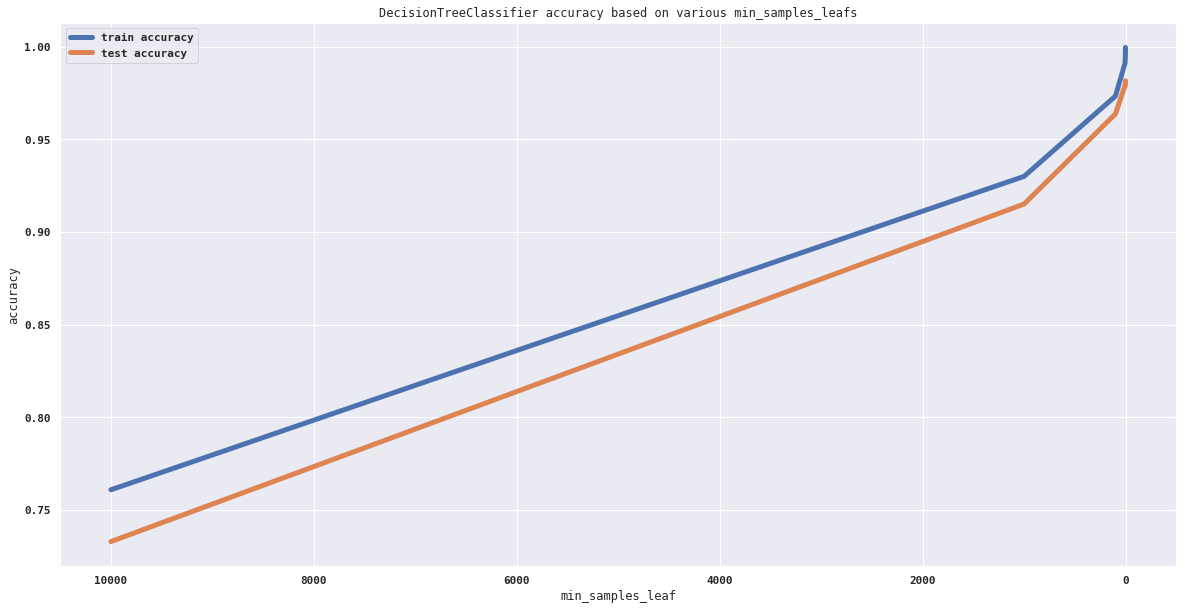

In [262]:
# plotting logreg accuracy based on min_samples_leaf
def plot_tree_leaf(train_set,test_set,leafs):
    plt.plot(leafs,train_set,label="train accuracy")
    plt.plot(leafs,test_set,label="test accuracy")
    plt.xlabel("min_samples_leaf")
    plt.ylabel("accuracy")
    plt.title("DecisionTreeClassifier accuracy based on various min_samples_leafs")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_tree_leaf(train_accuracy,test_accuracy,leafs=[1,2,5,100,1000,10000])

In [266]:
# perform manual optimization of min_samples_split

def optimize_tree_split(splits):
    d = {}
    for split in splits:
        d["tree"+str(split)] = DecisionTreeClassifier(min_samples_split=split).fit(X_train,y_train)
    train_accuracy = []
    test_accuracy = []
    for tree in d.keys():
        print(tree)
        print("Train accuracy: {:.2f}".format(d[tree].score(X_train,y_train)))
        train_accuracy.append(d[tree].score(X_train,y_train))
        print("Test accuracy: {:.2f}".format(d[tree].score(X_test,y_test)),"\n")
        test_accuracy.append(d[tree].score(X_test,y_test))
    return train_accuracy,test_accuracy
        
train_accuracy, test_accuracy = optimize_tree_split(splits=[0.01,0.1,2,5,1000])

tree0.01
Train accuracy: 0.99
Test accuracy: 0.98 

tree0.1
Train accuracy: 0.96
Test accuracy: 0.95 

tree2
Train accuracy: 1.00
Test accuracy: 0.98 

tree5
Train accuracy: 1.00
Test accuracy: 0.98 

tree1000
Train accuracy: 0.94
Test accuracy: 0.93 



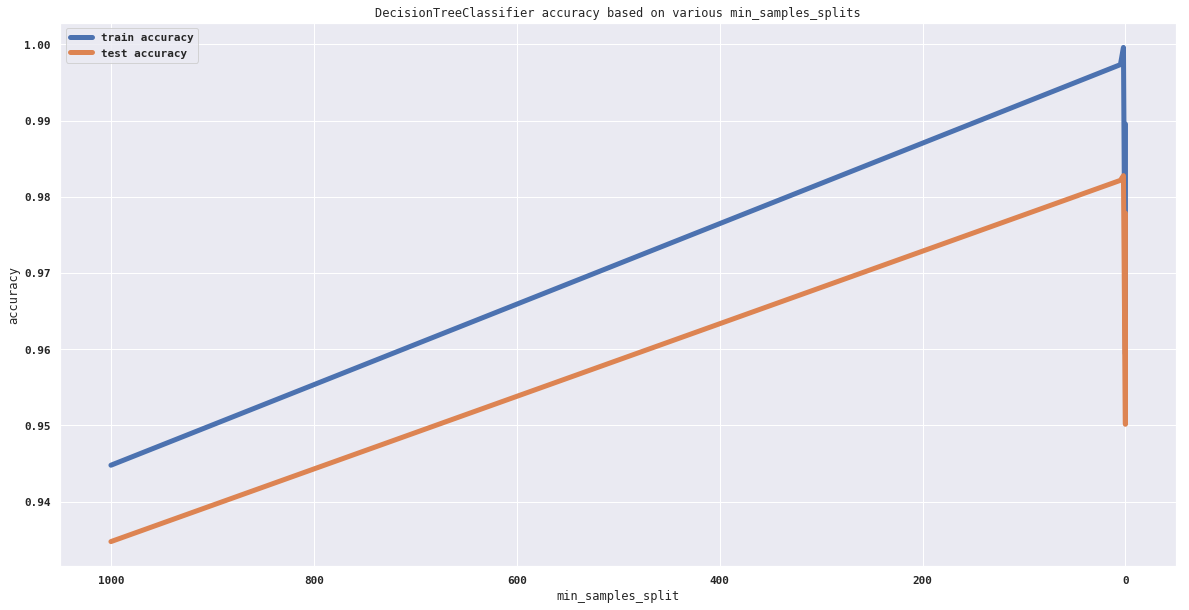

In [267]:
# plotting logreg accuracy based on min_samples_split
def plot_tree_split(train_set,test_set,splits):
    plt.plot(splits,train_set,label="train accuracy")
    plt.plot(splits,test_set,label="test accuracy")
    plt.xlabel("min_samples_split")
    plt.ylabel("accuracy")
    plt.title("DecisionTreeClassifier accuracy based on various min_samples_splits")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_tree_split(train_accuracy,test_accuracy,splits=[0.01,0.1,2,5,1000])

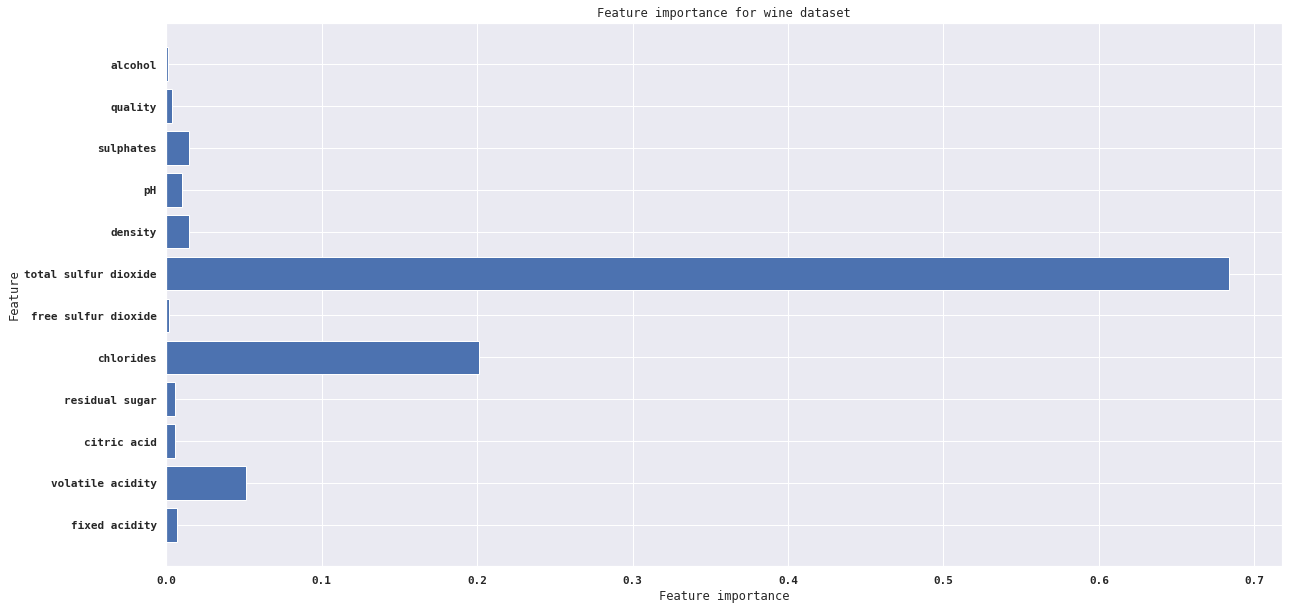

In [268]:
def plot_feature_importances(model):
    n_features = X_bin.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),names)
    plt.title('Feature importance for wine dataset')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(tree)

In [269]:
# define the parameter values that should be searched
leaf_range = [1,2,5,100,1000,10000]
split_range = [0.01,0.1,2,5,1000]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(min_samples_leaf=leaf_range,min_samples_split=split_range)

# instantiate the estimator
tree_grid = DecisionTreeClassifier()

# instantiate and fit the grid
grid_tree = GridSearchCV(tree_grid,param_grid,cv=10,scoring='accuracy',return_train_score=False)
grid_tree.fit(X_clf,y_clf)

# view the results
# ridge_df = pd.DataFrame(grid_knn.cv_results_)[['mean_test_score','std_test_score','params']]

# examine the best model
print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

0.9838386947822072
{'min_samples_leaf': 5, 'min_samples_split': 5}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [271]:
# now we can use the best parameters for prediction

tree = DecisionTreeClassifier(min_samples_leaf=5,min_samples_split=5).fit(X_train,y_train)
print("Train accuracy: {:.3f}".format(tree.score(X_train,y_train)))
print("Test accuracy: {:.3f}".format(tree.score(X_test,y_test)))

y_pred = tree.predict(X_test)
y_pred = np.reshape(y_pred,(-1,1))
print("Prediction accuracy: {:.3f}".format(np.sum(y_pred==y_test)/len(y_pred)))

Train accuracy: 0.991
Test accuracy: 0.980
Prediction accuracy: 0.980


### C) Use multiple classification to predict the quality of the wine on a test set

In [19]:
# splitting the data to X and y
X_train, X_test, y_train, y_test = train_test_split(X_mul,y_mul,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4872, 12), (1625, 12), (4872, 1), (1625, 1))

##### 1) LinearSVC for multiple classification

In [273]:
from sklearn.svm import LinearSVC

# create the classifier with default parameters
linsvc = LinearSVC()
linsvc.fit(X_train,y_train)
print(linsvc)

# report accuracy (on both train and test sets) with the default parameters
print("\nTrain accuracy: {:.3f}".format(linsvc.score(X_train,y_train)))
print("Test accuracy: {:.3f}".format(linsvc.score(X_test,y_test)))

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Train accuracy: 0.497
Test accuracy: 0.508


C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [274]:
# perform manual optimization of C

def optimize_linsvc_C(C):
    d = {}
    for c in C:
        d["linsvc"+str(c)] = LinearSVC(C=c).fit(X_train,y_train)
    train_accuracy = []
    test_accuracy = []
    for linsvc in d.keys():
        print(linsvc)
        print("Train accuracy: {:.3f}".format(d[linsvc].score(X_train,y_train)))
        train_accuracy.append(d[linsvc].score(X_train,y_train))
        print("Test accuracy: {:.3f}".format(d[linsvc].score(X_test,y_test)),"\n")
        test_accuracy.append(d[linsvc].score(X_test,y_test))
    return train_accuracy,test_accuracy
        
train_accuracy, test_accuracy = optimize_linsvc_C(C=[0.001,0.01,0.1,1,10,100])

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\valid

linsvc0.001
Train accuracy: 0.499
Test accuracy: 0.504 

linsvc0.01
Train accuracy: 0.525
Test accuracy: 0.498 

linsvc0.1
Train accuracy: 0.467
Test accuracy: 0.481 

linsvc1
Train accuracy: 0.431
Test accuracy: 0.401 

linsvc10
Train accuracy: 0.490
Test accuracy: 0.499 

linsvc100
Train accuracy: 0.258
Test accuracy: 0.265 



C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


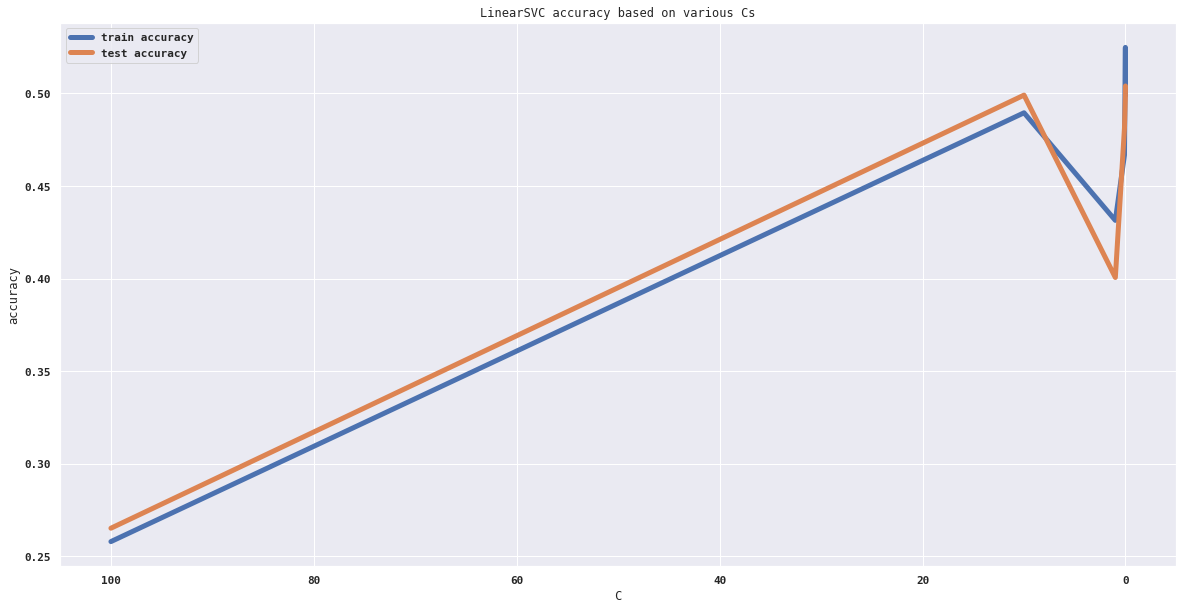

In [276]:
# plotting logreg accuracy based on C
def plot_linsvc_C(train_set,test_set,C):
    plt.plot(C,train_set,label="train accuracy")
    plt.plot(C,test_set,label="test accuracy")
    plt.xlabel("C")
    plt.ylabel("accuracy")
    plt.title("LinearSVC accuracy based on various Cs")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_linsvc_C(train_accuracy,test_accuracy,C=[0.001,0.01,0.1,1,10,100])

In [277]:
# perform manual optimization of max_iter

def optimize_linsvc_maxiter(max_iters):
    d = {}
    for max_iter in max_iters:
        d["linsvc"+str(max_iter)] = LinearSVC(max_iter=max_iter).fit(X_train,y_train)
    train_accuracy = []
    test_accuracy = []
    for linsvc in d.keys():
        print(linsvc)
        print("Train accuracy: {:.3f}".format(d[linsvc].score(X_train,y_train)))
        train_accuracy.append(d[linsvc].score(X_train,y_train))
        print("Test accuracy: {:.3f}".format(d[linsvc].score(X_test,y_test)),"\n")
        test_accuracy.append(d[linsvc].score(X_test,y_test))
    return train_accuracy,test_accuracy
        
train_accuracy, test_accuracy = optimize_linsvc_maxiter(max_iters=[1,10,100,1000,10000])

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\utils\valid

linsvc1
Train accuracy: 0.359
Test accuracy: 0.358 

linsvc10
Train accuracy: 0.437
Test accuracy: 0.453 

linsvc100
Train accuracy: 0.365
Test accuracy: 0.372 

linsvc1000
Train accuracy: 0.435
Test accuracy: 0.458 

linsvc10000
Train accuracy: 0.383
Test accuracy: 0.358 



C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


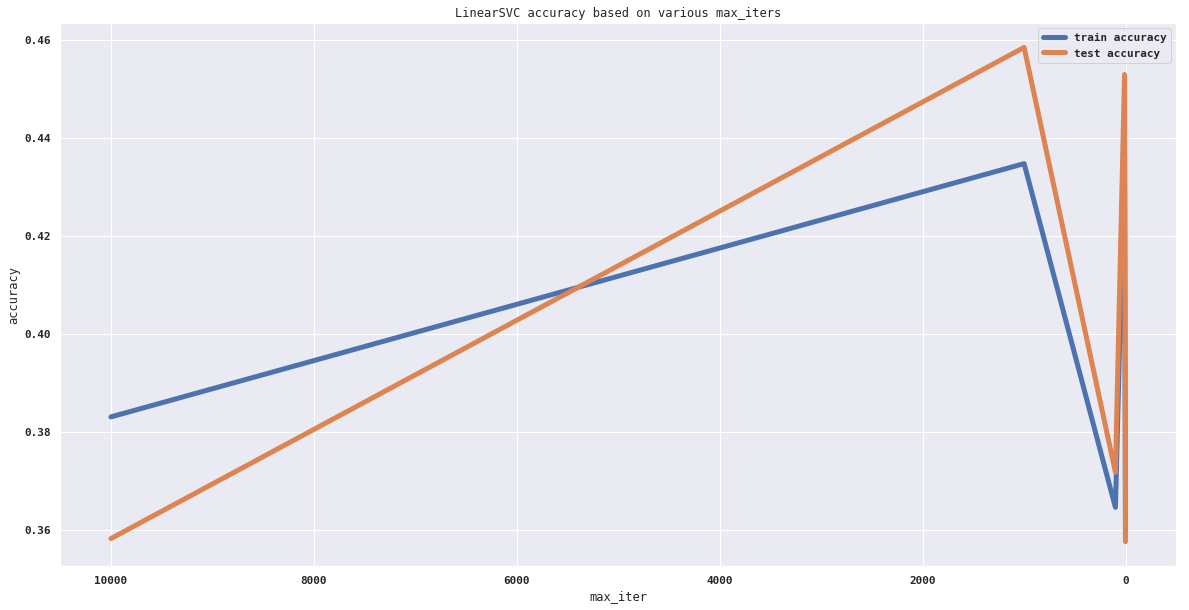

In [280]:
# plotting linsvc accuracy based on max_iter
def plot_linsvc_maxiter(train_set,test_set,max_iters):
    plt.plot(max_iters,train_set,label="train accuracy")
    plt.plot(max_iters,test_set,label="test accuracy")
    plt.xlabel("max_iter")
    plt.ylabel("accuracy")
    plt.title("LinearSVC accuracy based on various max_iters")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_linsvc_maxiter(train_accuracy,test_accuracy,max_iters=[1,10,100,1000,10000])

##### 2) RandomForestClassifier for multiple classification

In [281]:
from sklearn.ensemble import RandomForestClassifier

# create the classifier with default parameters
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
print(forest)

# report accuracy (on both train and test sets) with the default parameters
print("\nTrain accuracy: {:.3f}".format(forest.score(X_train,y_train)))
print("Test accuracy: {:.3f}".format(forest.score(X_test,y_test)))

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Train accuracy: 0.987
Test accuracy: 0.661


In [284]:
# perform manual optimization of n_estimators

def optimize_forest_est(n_estimators):
    d = {}
    for n_estimator in n_estimators:
        d["forest"+str(n_estimator)] = RandomForestClassifier(n_estimators=n_estimator).fit(X_train,y_train)
    train_accuracy = []
    test_accuracy = []
    for forest in d.keys():
        print(forest)
        print("Train accuracy: {:.3f}".format(d[forest].score(X_train,y_train)))
        train_accuracy.append(d[forest].score(X_train,y_train))
        print("Test accuracy: {:.3f}".format(d[forest].score(X_test,y_test)),"\n")
        test_accuracy.append(d[forest].score(X_test,y_test))
    return train_accuracy,test_accuracy
        
train_accuracy, test_accuracy = optimize_forest_est(n_estimators=[1,10,100,1000,5000])

C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A col

forest1
Train accuracy: 0.831
Test accuracy: 0.543 

forest10
Train accuracy: 0.989
Test accuracy: 0.643 

forest100
Train accuracy: 1.000
Test accuracy: 0.666 

forest1000
Train accuracy: 1.000
Test accuracy: 0.681 

forest5000
Train accuracy: 1.000
Test accuracy: 0.678 



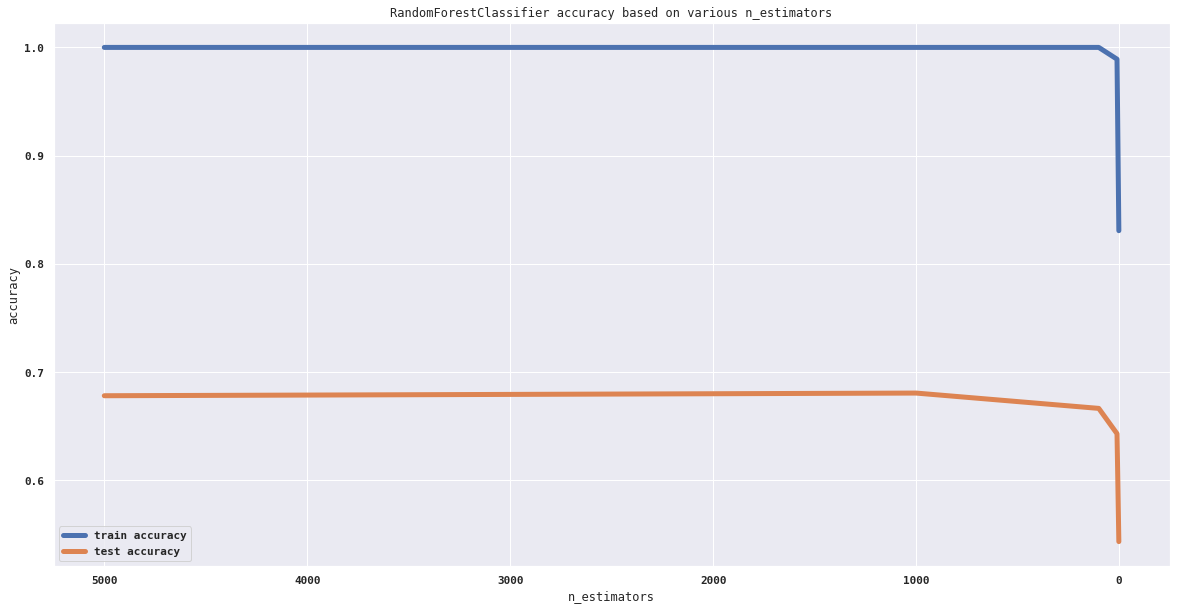

In [285]:
# plotting forest accuracy based on n_estimators
def plot_forest_est(train_set,test_set,n_estimators):
    plt.plot(n_estimators,train_set,label="train accuracy")
    plt.plot(n_estimators,test_set,label="test accuracy")
    plt.xlabel("n_estimators")
    plt.ylabel("accuracy")
    plt.title("RandomForestClassifier accuracy based on various n_estimators")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_forest_est(train_accuracy,test_accuracy,n_estimators=[1,10,100,1000,5000])

In [286]:
# perform manual optimization of min_samples_leaf

def optimize_forest_leaf(leafs):
    d = {}
    for leaf in leafs:
        d["forest"+str(leaf)] = RandomForestClassifier(min_samples_leaf=leaf).fit(X_train,y_train)
    train_accuracy = []
    test_accuracy = []
    for forest in d.keys():
        print(forest)
        print("Train accuracy: {:.3f}".format(d[forest].score(X_train,y_train)))
        train_accuracy.append(d[forest].score(X_train,y_train))
        print("Test accuracy: {:.3f}".format(d[forest].score(X_test,y_test)),"\n")
        test_accuracy.append(d[forest].score(X_test,y_test))
    return train_accuracy,test_accuracy
        
train_accuracy, test_accuracy = optimize_forest_leaf(leafs=[1,2,5,100,1000,10000])

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarni

forest1
Train accuracy: 0.987
Test accuracy: 0.654 

forest2
Train accuracy: 0.951
Test accuracy: 0.633 

forest5
Train accuracy: 0.820
Test accuracy: 0.615 

forest100
Train accuracy: 0.564
Test accuracy: 0.537 

forest1000
Train accuracy: 0.511
Test accuracy: 0.508 

forest10000
Train accuracy: 0.431
Test accuracy: 0.454 



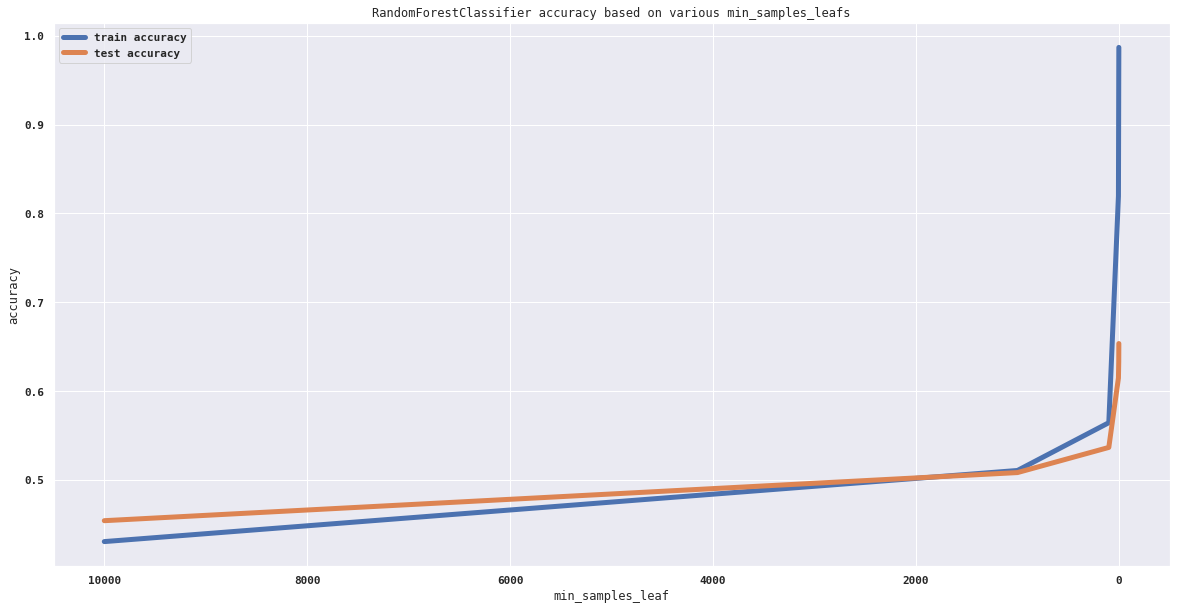

In [287]:
# plotting logreg accuracy based on min_samples_leaf
def plot_forest_leaf(train_set,test_set,leafs):
    plt.plot(leafs,train_set,label="train accuracy")
    plt.plot(leafs,test_set,label="test accuracy")
    plt.xlabel("min_samples_leaf")
    plt.ylabel("accuracy")
    plt.title("RandomForestClassifier accuracy based on various min_samples_leafs")
    plt.gca().invert_xaxis()
    plt.legend()
    
plot_forest_leaf(train_accuracy,test_accuracy,leafs=[1,2,5,100,1000,10000])

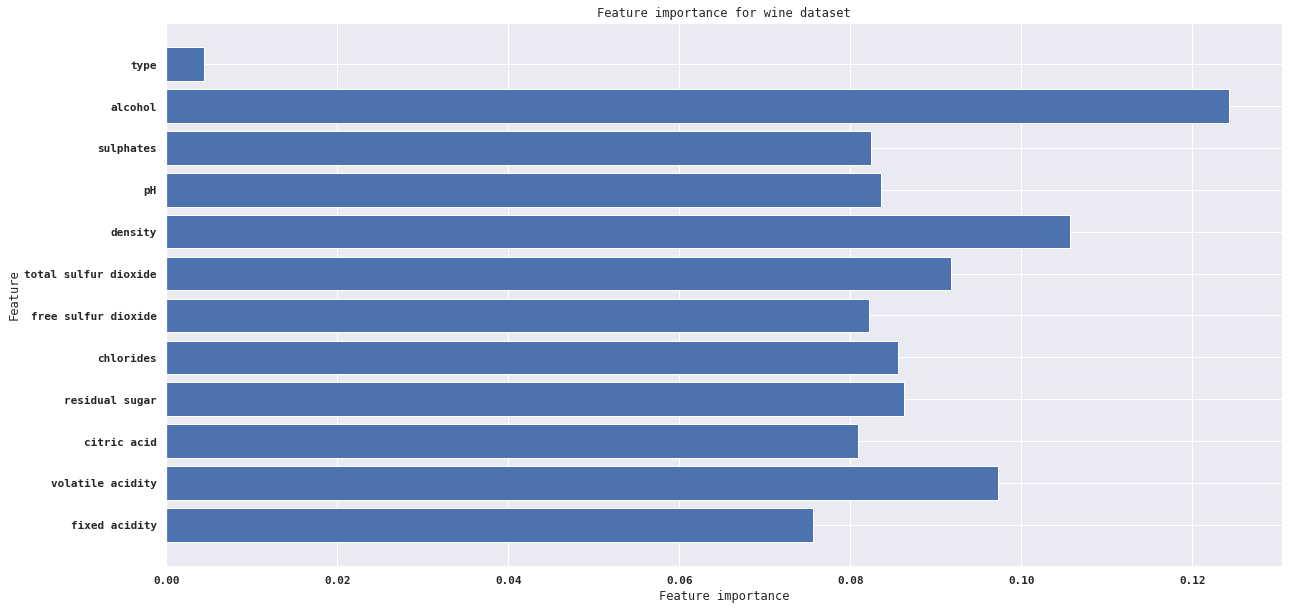

In [288]:
names = ['fixed acidity','volatile acidity','citric acid','residual sugar',
         'chlorides','free sulfur dioxide','total sulfur dioxide','density',
         'pH','sulphates','alcohol',"type"]

def plot_feature_importances(model):
    n_features = X_mul.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),names)
    plt.title('Feature importance for wine dataset')
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances(forest)

In [17]:
# define the parameter values that should be searched

estimator_range = [1,10,20,50,100]
leaf_range = [1,2,5,10,100]

# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_estimators=estimator_range,min_samples_leaf=leaf_range)

# instantiate the estimator
forest_grid = RandomForestClassifier(n_jobs=2)

# instantiate and fit the grid
grid_forest = GridSearchCV(forest_grid,param_grid,cv=10,scoring='accuracy',return_train_score=False)
grid_forest.fit(X_mul,y_mul)

# view the results
# ridge_df = pd.DataFrame(grid_knn.cv_results_)[['mean_test_score','std_test_score','params']]

# examine the best model
print(grid_forest.best_score_)
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:626: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed wh

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\alisa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y wa

0.5171617669693704
{'min_samples_leaf': 100, 'n_estimators': 100}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [20]:
# now we can use the best parameters for prediction

forest = RandomForestClassifier(n_estimators=100,min_samples_leaf=100).fit(X_train,y_train)
print("Train accuracy: {:.3f}".format(forest.score(X_train,y_train)))
print("Test accuracy: {:.3f}".format(forest.score(X_test,y_test)))

y_pred = forest.predict(X_test)
y_pred = np.reshape(y_pred,(-1,1))
print("Prediction accuracy: {:.3f}".format(np.sum(y_pred==y_test)/len(y_pred)))

C:\Users\alisa\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train accuracy: 0.564
Test accuracy: 0.548
Prediction accuracy: 0.548
